# To do list

[Solar radiation](#Solar-radiation)
- [x] dssf => ra_i, trans_24, ra_24

In [2]:
%run ..\Functions.ipynb

# Test

In [14]:
fh= r"E:\WaPORQA\MSG\MDIDSSF\NETCDF4_LSASAF_MSG_DIDSSF_MSG-Disk_201901010000.nc"
ds=xr.open_dataset(fh)
ds

<xarray.Dataset>
Dimensions:                        (time: 1, lat: 3201, lon: 3201)
Coordinates:
  * lat                            (lat) float32 80.0 79.95 ... -79.95 -80.0
  * lon                            (lon) float32 -80.0 -79.95 ... 79.95 80.0
  * time                           (time) datetime64[ns] 2019-01-01
Data variables:
    DSSF                           (time, lat, lon) float64 ...
    crs                            |S1 ...
    max_nslots_missing             (time, lat, lon) float64 ...
    missing_values_percent         (time, lat, lon) float64 ...
    weight_missing_values_percent  (time, lat, lon) float64 ...
Attributes: (12/27)
    date_created:               2022-12-02T09:36:57Z
    algorithm_version:          2.0.0
    base_algorithm_version:     0.6.1
    processing_level:           04
    platform:                   MSG4
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:                CF-1.6
    netcdf_version_id:          netCDF4

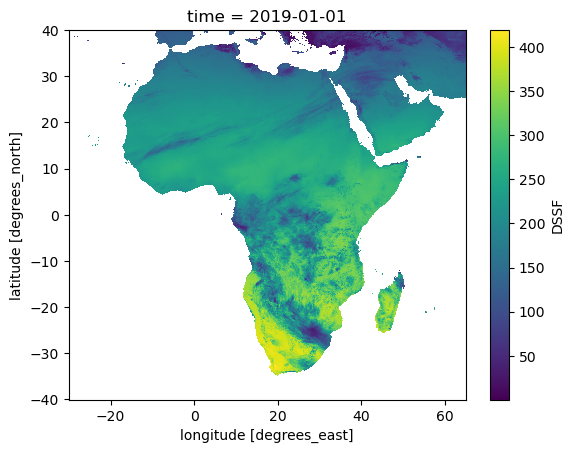

In [15]:
min_lat = -40
max_lat = 40.0
min_lon = -30
max_lon = 65
sliced_ds = ds.sel(
lat=slice(max_lat,min_lat),
lon=slice(min_lon, max_lon)
)
ra_d=sliced_ds.DSSF/86400
ra_d.plot()

# DSSF

In [4]:
date

datetime.date(2021, 7, 22)

In [8]:
# import the datetime module
import datetime

folder=r"E:\WaPORQA\MSG\MDIDSSF"
save_folder=r"E:\WaPORQA\MSG\MDIDSSF\Processed"
# create a range of dates from 2018-01-01 to 2022-12-31
start_date = datetime.date(2022, 11, 25) #to be continued. 24/11
end_date = datetime.date(2022, 12, 31)
date_range = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# for each date print a string with this format YYYYMMDD
for date in date_range:
    datestr=date.strftime("%Y%m%d")
    day_fhs=glob.glob(os.path.join(folder,
                                   '*{0}*.nc'.format(datestr))) 
    ds=xr.open_mfdataset(day_fhs)
    ra_w = J_per_day_to_W(ds.DSSF, 
                          attrs={'input': 'MSG MDIDSSF DSSF'})
    
    save_ds = xr.Dataset({
                          'ra': ra_w
                         })
    results = save_ds.compute()
    datestr=date.strftime("%Y-%m-%d")
    filepath=os.path.join(save_folder,datestr+"_ra.nc")
    results.to_netcdf(filepath)
                          
